In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("resources/data/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_count = application_df['APPLICATION_TYPE'].value_counts()
app_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

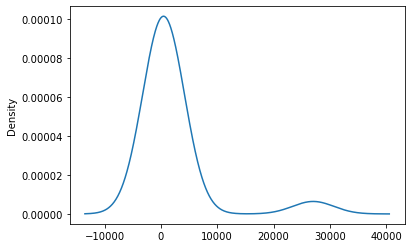

In [5]:
# Visualize the value counts of APPLICATION_TYPE
app_count.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = app_count[app_count<500].index.to_list()

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification = application_df['CLASSIFICATION'].value_counts()
classification

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

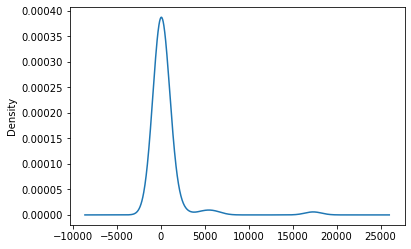

In [8]:
# Visualize the value counts of CLASSIFICATION
classification.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = classification[classification<1700].index.to_list()

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
cat_list = application_df.dtypes[application_df.dtypes=='object'].index.tolist()

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df=pd.DataFrame(enc.fit_transform(application_df[cat_list]))
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cat_list)
encode_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)

application_df=application_df.drop(cat_list,1)

C:\Users\kaush\AppData\Local\Temp\ipykernel_20644\3632453308.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  application_df=application_df.drop(cat_list,1)


In [13]:
# Split our preprocessed data into our features and target arrays
X=application_df.drop(['IS_SUCCESSFUL'],1)
y=application_df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

C:\Users\kaush\AppData\Local\Temp\ipykernel_20644\2004519618.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=application_df.drop(['IS_SUCCESSFUL'],1)


In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
X_train_scaled.shape

(25724, 43)

In [16]:
X_train_scaled.shape[1]

43

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = X_train_scaled.shape[1]
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 40
#hidden_nodes_layer3 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,
                            input_dim=number_input_features,
                            activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,
                            activation='relu'))

# Third hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3,
#                                 activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1,
                            activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4400      
                                                                 
 dense_1 (Dense)             (None, 40)                4040      
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 8,481
Trainable params: 8,481
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [19]:
# Create a callback that saves the model's weights
checkpoint_path = 'resources/data/callback'
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=5)

In [20]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs=20, callbacks=[callback])

Epoch 1/20
  1/804 [..............................] - ETA: 8:07 - loss: 4069.2361 - accuracy: 0.6250
Epoch 1: saving model to resources/data\callback
  5/804 [..............................] - ETA: 11s - loss: 20550.6348 - accuracy: 0.5750
Epoch 1: saving model to resources/data\callback
 10/804 [..............................] - ETA: 9s - loss: 11876.2012 - accuracy: 0.4938 
Epoch 1: saving model to resources/data\callback
 15/804 [..............................] - ETA: 9s - loss: 30607.0645 - accuracy: 0.4833
Epoch 1: saving model to resources/data\callback
 20/804 [..............................] - ETA: 9s - loss: 24024.2109 - accuracy: 0.4641
Epoch 1: saving model to resources/data\callback
 25/804 [..............................] - ETA: 9s - loss: 31527.3203 - accuracy: 0.4538
Epoch 1: saving model to resources/data\callback
 30/804 [>.............................] - ETA: 9s - loss: 26390.8340 - accuracy: 0.4635
Epoch 1: saving model to resources/data\callback
 36/804 [>..........

300/804 [==========>...................] - ETA: 6s - loss: 137483.9688 - accuracy: 0.4880
Epoch 1: saving model to resources/data\callback
305/804 [==========>...................] - ETA: 6s - loss: 135309.7500 - accuracy: 0.4878
Epoch 1: saving model to resources/data\callback
310/804 [==========>...................] - ETA: 6s - loss: 139554.0938 - accuracy: 0.4867
Epoch 1: saving model to resources/data\callback
315/804 [==========>...................] - ETA: 6s - loss: 137360.1875 - accuracy: 0.4879
Epoch 1: saving model to resources/data\callback
320/804 [==========>...................] - ETA: 6s - loss: 135263.9688 - accuracy: 0.4879
Epoch 1: saving model to resources/data\callback
325/804 [===========>..................] - ETA: 6s - loss: 133339.0781 - accuracy: 0.4876
Epoch 1: saving model to resources/data\callback
330/804 [===========>..................] - ETA: 6s - loss: 131668.7344 - accuracy: 0.4874
Epoch 1: saving model to resources/data\callback
335/804 [===========>......

112/804 [===>..........................] - ETA: 7s - loss: 5604.7368 - accuracy: 0.4824
Epoch 2: saving model to resources/data\callback
117/804 [===>..........................] - ETA: 6s - loss: 5466.6001 - accuracy: 0.4805
Epoch 2: saving model to resources/data\callback
124/804 [===>..........................] - ETA: 6s - loss: 5192.0732 - accuracy: 0.4808
Epoch 2: saving model to resources/data\callback

Epoch 2: saving model to resources/data\callback
131/804 [===>..........................] - ETA: 6s - loss: 5240.3862 - accuracy: 0.4790
Epoch 2: saving model to resources/data\callback
137/804 [====>.........................] - ETA: 6s - loss: 5240.3447 - accuracy: 0.4808
Epoch 2: saving model to resources/data\callback
142/804 [====>.........................] - ETA: 6s - loss: 8685.5732 - accuracy: 0.4828
Epoch 2: saving model to resources/data\callback
148/804 [====>.........................] - ETA: 6s - loss: 13116.9365 - accuracy: 0.4856
Epoch 2: saving model to resources/data

727/804 [==========================>...] - ETA: 0s - loss: 83080.5781 - accuracy: 0.4872
Epoch 2: saving model to resources/data\callback
734/804 [==========================>...] - ETA: 0s - loss: 86445.1406 - accuracy: 0.4874
Epoch 2: saving model to resources/data\callback
740/804 [==========================>...] - ETA: 0s - loss: 97644.8828 - accuracy: 0.4877
Epoch 2: saving model to resources/data\callback

Epoch 2: saving model to resources/data\callback
746/804 [==========================>...] - ETA: 0s - loss: 97343.3672 - accuracy: 0.4882
Epoch 2: saving model to resources/data\callback
752/804 [===========================>..] - ETA: 0s - loss: 97863.8438 - accuracy: 0.4887
Epoch 2: saving model to resources/data\callback
759/804 [===========================>..] - ETA: 0s - loss: 97104.6562 - accuracy: 0.4895
Epoch 2: saving model to resources/data\callback
763/804 [===========================>..] - ETA: 0s - loss: 96635.9297 - accuracy: 0.4899
Epoch 2: saving model to resource

239/804 [=======>......................] - ETA: 5s - loss: 172628.3750 - accuracy: 0.5090
Epoch 3: saving model to resources/data\callback
242/804 [========>.....................] - ETA: 6s - loss: 170501.5938 - accuracy: 0.5088
Epoch 3: saving model to resources/data\callback
247/804 [========>.....................] - ETA: 5s - loss: 167051.7344 - accuracy: 0.5101
Epoch 3: saving model to resources/data\callback
252/804 [========>.....................] - ETA: 5s - loss: 164246.0312 - accuracy: 0.5097
Epoch 3: saving model to resources/data\callback
257/804 [========>.....................] - ETA: 5s - loss: 161929.9844 - accuracy: 0.5079
Epoch 3: saving model to resources/data\callback
262/804 [========>.....................] - ETA: 5s - loss: 159375.0625 - accuracy: 0.5062
Epoch 3: saving model to resources/data\callback
267/804 [========>.....................] - ETA: 5s - loss: 156476.8438 - accuracy: 0.5059
Epoch 3: saving model to resources/data\callback
273/804 [=========>........

 65/804 [=>............................] - ETA: 7s - loss: 63459.3125 - accuracy: 0.5486
Epoch 4: saving model to resources/data\callback
 70/804 [=>............................] - ETA: 7s - loss: 59766.3555 - accuracy: 0.5446
Epoch 4: saving model to resources/data\callback

Epoch 4: saving model to resources/data\callback
 78/804 [=>............................] - ETA: 7s - loss: 79225.1719 - accuracy: 0.5437
Epoch 4: saving model to resources/data\callback
 85/804 [==>...........................] - ETA: 7s - loss: 73085.9609 - accuracy: 0.5437
Epoch 4: saving model to resources/data\callback
 90/804 [==>...........................] - ETA: 7s - loss: 69126.7656 - accuracy: 0.5403
Epoch 4: saving model to resources/data\callback
 95/804 [==>...........................] - ETA: 7s - loss: 65509.2852 - accuracy: 0.5382
Epoch 4: saving model to resources/data\callback
101/804 [==>...........................] - ETA: 6s - loss: 61693.8945 - accuracy: 0.5381
Epoch 4: saving model to resource

703/804 [=========================>....] - ETA: 1s - loss: 38294.4375 - accuracy: 0.5042
Epoch 4: saving model to resources/data\callback
710/804 [=========================>....] - ETA: 0s - loss: 38714.5352 - accuracy: 0.5048
Epoch 4: saving model to resources/data\callback

Epoch 4: saving model to resources/data\callback
718/804 [=========================>....] - ETA: 0s - loss: 38391.2812 - accuracy: 0.5050
Epoch 4: saving model to resources/data\callback
724/804 [==========================>...] - ETA: 0s - loss: 41257.6562 - accuracy: 0.5051
Epoch 4: saving model to resources/data\callback
728/804 [==========================>...] - ETA: 0s - loss: 41205.4414 - accuracy: 0.5052
Epoch 4: saving model to resources/data\callback
733/804 [==========================>...] - ETA: 0s - loss: 42287.1836 - accuracy: 0.5056
Epoch 4: saving model to resources/data\callback
738/804 [==========================>...] - ETA: 0s - loss: 42591.1641 - accuracy: 0.5056
Epoch 4: saving model to resource

534/804 [==================>...........] - ETA: 2s - loss: 27684.9922 - accuracy: 0.5125
Epoch 5: saving model to resources/data\callback
539/804 [===================>..........] - ETA: 2s - loss: 27428.2051 - accuracy: 0.5126
Epoch 5: saving model to resources/data\callback
546/804 [===================>..........] - ETA: 2s - loss: 27076.9746 - accuracy: 0.5126
Epoch 5: saving model to resources/data\callback
552/804 [===================>..........] - ETA: 2s - loss: 26782.7266 - accuracy: 0.5127
Epoch 5: saving model to resources/data\callback
556/804 [===================>..........] - ETA: 2s - loss: 26590.1328 - accuracy: 0.5129
Epoch 5: saving model to resources/data\callback
562/804 [===================>..........] - ETA: 2s - loss: 26306.3867 - accuracy: 0.5135
Epoch 5: saving model to resources/data\callback
568/804 [====================>.........] - ETA: 2s - loss: 26028.7910 - accuracy: 0.5128
Epoch 5: saving model to resources/data\callback

Epoch 5: saving model to resource

349/804 [============>.................] - ETA: 4s - loss: 12824.4785 - accuracy: 0.5023
Epoch 6: saving model to resources/data\callback
350/804 [============>.................] - ETA: 4s - loss: 12788.3145 - accuracy: 0.5027
Epoch 6: saving model to resources/data\callback
355/804 [============>.................] - ETA: 4s - loss: 12613.7686 - accuracy: 0.5016
Epoch 6: saving model to resources/data\callback
360/804 [============>.................] - ETA: 4s - loss: 12470.2002 - accuracy: 0.5014
Epoch 6: saving model to resources/data\callback
365/804 [============>.................] - ETA: 4s - loss: 12307.6328 - accuracy: 0.5014
Epoch 6: saving model to resources/data\callback
372/804 [============>.................] - ETA: 4s - loss: 12175.3291 - accuracy: 0.4999
Epoch 6: saving model to resources/data\callback
377/804 [=============>................] - ETA: 4s - loss: 12066.2285 - accuracy: 0.5003
Epoch 6: saving model to resources/data\callback

Epoch 6: saving model to resource

167/804 [=====>........................] - ETA: 6s - loss: 206088.2188 - accuracy: 0.5240
Epoch 7: saving model to resources/data\callback
174/804 [=====>........................] - ETA: 6s - loss: 198602.1875 - accuracy: 0.5219
Epoch 7: saving model to resources/data\callback
177/804 [=====>........................] - ETA: 6s - loss: 195435.2500 - accuracy: 0.5205
Epoch 7: saving model to resources/data\callback
181/804 [=====>........................] - ETA: 6s - loss: 191183.7188 - accuracy: 0.5180
Epoch 7: saving model to resources/data\callback
186/804 [=====>........................] - ETA: 6s - loss: 186541.0781 - accuracy: 0.5151
Epoch 7: saving model to resources/data\callback
191/804 [======>.......................] - ETA: 6s - loss: 181839.5000 - accuracy: 0.5136
Epoch 7: saving model to resources/data\callback
197/804 [======>.......................] - ETA: 6s - loss: 176391.3906 - accuracy: 0.5141
Epoch 7: saving model to resources/data\callback
205/804 [======>...........

491/804 [=================>............] - ETA: 3s - loss: 102439.5078 - accuracy: 0.5192
Epoch 7: saving model to resources/data\callback
498/804 [=================>............] - ETA: 3s - loss: 104089.5781 - accuracy: 0.5188
Epoch 7: saving model to resources/data\callback

Epoch 7: saving model to resources/data\callback
506/804 [=================>............] - ETA: 3s - loss: 102451.8438 - accuracy: 0.5185
Epoch 7: saving model to resources/data\callback
512/804 [==================>...........] - ETA: 3s - loss: 101254.3828 - accuracy: 0.5197
Epoch 7: saving model to resources/data\callback
516/804 [==================>...........] - ETA: 3s - loss: 100473.5625 - accuracy: 0.5196
Epoch 7: saving model to resources/data\callback
521/804 [==================>...........] - ETA: 3s - loss: 99510.6094 - accuracy: 0.5196 
Epoch 7: saving model to resources/data\callback
526/804 [==================>...........] - ETA: 3s - loss: 98573.8125 - accuracy: 0.5195
Epoch 7: saving model to re

322/804 [===========>..................] - ETA: 5s - loss: 67323.4453 - accuracy: 0.5451
Epoch 8: saving model to resources/data\callback
327/804 [===========>..................] - ETA: 5s - loss: 67021.3203 - accuracy: 0.5437
Epoch 8: saving model to resources/data\callback
335/804 [===========>..................] - ETA: 5s - loss: 65477.2227 - accuracy: 0.5426
Epoch 8: saving model to resources/data\callback

Epoch 8: saving model to resources/data\callback
342/804 [===========>..................] - ETA: 5s - loss: 64430.6836 - accuracy: 0.5422
Epoch 8: saving model to resources/data\callback
349/804 [============>.................] - ETA: 4s - loss: 65820.8828 - accuracy: 0.5390
Epoch 8: saving model to resources/data\callback
352/804 [============>.................] - ETA: 4s - loss: 65267.6992 - accuracy: 0.5376
Epoch 8: saving model to resources/data\callback
357/804 [============>.................] - ETA: 4s - loss: 64383.8672 - accuracy: 0.5368
Epoch 8: saving model to resource

143/804 [====>.........................] - ETA: 6s - loss: 2372.3604 - accuracy: 0.5037
Epoch 9: saving model to resources/data\callback
150/804 [====>.........................] - ETA: 6s - loss: 2295.8752 - accuracy: 0.5027
Epoch 9: saving model to resources/data\callback

Epoch 9: saving model to resources/data\callback
158/804 [====>.........................] - ETA: 6s - loss: 2414.2017 - accuracy: 0.5010
Epoch 9: saving model to resources/data\callback
163/804 [=====>........................] - ETA: 6s - loss: 2713.0264 - accuracy: 0.5029
Epoch 9: saving model to resources/data\callback
168/804 [=====>........................] - ETA: 6s - loss: 2639.5483 - accuracy: 0.5007
Epoch 9: saving model to resources/data\callback
175/804 [=====>........................] - ETA: 6s - loss: 2558.9319 - accuracy: 0.4988
Epoch 9: saving model to resources/data\callback
182/804 [=====>........................] - ETA: 6s - loss: 4096.6719 - accuracy: 0.4969
Epoch 9: saving model to resources/data\

774/804 [===========================>..] - ETA: 0s - loss: 23953.0664 - accuracy: 0.5182
Epoch 9: saving model to resources/data\callback
780/804 [============================>.] - ETA: 0s - loss: 23906.7871 - accuracy: 0.5182
Epoch 9: saving model to resources/data\callback
786/804 [============================>.] - ETA: 0s - loss: 23735.2773 - accuracy: 0.5186
Epoch 9: saving model to resources/data\callback

Epoch 9: saving model to resources/data\callback
793/804 [============================>.] - ETA: 0s - loss: 23549.1484 - accuracy: 0.5189
Epoch 9: saving model to resources/data\callback
801/804 [============================>.] - ETA: 0s - loss: 23724.0020 - accuracy: 0.5190
Epoch 9: saving model to resources/data\callback
804/804 [==============================] - 8s 10ms/step - loss: 23671.8691 - accuracy: 0.5189
Epoch 10/20
  1/804 [..............................] - ETA: 2s - loss: 5.0491 - accuracy: 0.5625
Epoch 10: saving model to resources/data\callback
  8/804 [..........

647/804 [=======================>......] - ETA: 1s - loss: 8988.3809 - accuracy: 0.5475
Epoch 10: saving model to resources/data\callback
652/804 [=======================>......] - ETA: 1s - loss: 9116.3623 - accuracy: 0.5474
Epoch 10: saving model to resources/data\callback
657/804 [=======================>......] - ETA: 1s - loss: 9125.6943 - accuracy: 0.5468
Epoch 10: saving model to resources/data\callback
663/804 [=======================>......] - ETA: 1s - loss: 9516.2842 - accuracy: 0.5465
Epoch 10: saving model to resources/data\callback

Epoch 10: saving model to resources/data\callback
669/804 [=======================>......] - ETA: 1s - loss: 9858.7451 - accuracy: 0.5459
Epoch 10: saving model to resources/data\callback
674/804 [========================>.....] - ETA: 1s - loss: 9811.3477 - accuracy: 0.5459
Epoch 10: saving model to resources/data\callback
679/804 [========================>.....] - ETA: 1s - loss: 9811.0723 - accuracy: 0.5461
Epoch 10: saving model to resourc

498/804 [=================>............] - ETA: 2s - loss: 10491.8545 - accuracy: 0.5197
Epoch 11: saving model to resources/data\callback

Epoch 11: saving model to resources/data\callback
505/804 [=================>............] - ETA: 2s - loss: 10346.8623 - accuracy: 0.5213
Epoch 11: saving model to resources/data\callback
512/804 [==================>...........] - ETA: 2s - loss: 10205.4932 - accuracy: 0.5237
Epoch 11: saving model to resources/data\callback

Epoch 11: saving model to resources/data\callback
520/804 [==================>...........] - ETA: 2s - loss: 10051.2754 - accuracy: 0.5255
Epoch 11: saving model to resources/data\callback
527/804 [==================>...........] - ETA: 2s - loss: 9918.0146 - accuracy: 0.5273 
Epoch 11: saving model to resources/data\callback

Epoch 11: saving model to resources/data\callback
535/804 [==================>...........] - ETA: 2s - loss: 9770.2627 - accuracy: 0.5294
Epoch 11: saving model to resources/data\callback
543/804 [=====

326/804 [===========>..................] - ETA: 5s - loss: 5502.1094 - accuracy: 0.5441
Epoch 12: saving model to resources/data\callback
333/804 [===========>..................] - ETA: 4s - loss: 5518.0522 - accuracy: 0.5416
Epoch 12: saving model to resources/data\callback
338/804 [===========>..................] - ETA: 4s - loss: 11498.8545 - accuracy: 0.5411
Epoch 12: saving model to resources/data\callback
341/804 [===========>..................] - ETA: 4s - loss: 11552.8779 - accuracy: 0.5408
Epoch 12: saving model to resources/data\callback
348/804 [===========>..................] - ETA: 4s - loss: 11910.5117 - accuracy: 0.5405
Epoch 12: saving model to resources/data\callback
352/804 [============>.................] - ETA: 4s - loss: 11789.6709 - accuracy: 0.5403
Epoch 12: saving model to resources/data\callback
356/804 [============>.................] - ETA: 4s - loss: 14261.1836 - accuracy: 0.5406
Epoch 12: saving model to resources/data\callback
361/804 [============>.......

654/804 [=======================>......] - ETA: 1s - loss: 14659.3867 - accuracy: 0.5183
Epoch 12: saving model to resources/data\callback
660/804 [=======================>......] - ETA: 1s - loss: 14651.9150 - accuracy: 0.5177
Epoch 12: saving model to resources/data\callback

Epoch 12: saving model to resources/data\callback
666/804 [=======================>......] - ETA: 1s - loss: 14572.6348 - accuracy: 0.5180
Epoch 12: saving model to resources/data\callback
671/804 [========================>.....] - ETA: 1s - loss: 14468.0898 - accuracy: 0.5187
Epoch 12: saving model to resources/data\callback
676/804 [========================>.....] - ETA: 1s - loss: 14364.2266 - accuracy: 0.5189
Epoch 12: saving model to resources/data\callback
681/804 [========================>.....] - ETA: 1s - loss: 14274.7578 - accuracy: 0.5190
Epoch 12: saving model to resources/data\callback
686/804 [========================>.....] - ETA: 1s - loss: 14175.8809 - accuracy: 0.5196
Epoch 12: saving model to 

481/804 [================>.............] - ETA: 3s - loss: 43374.3516 - accuracy: 0.5010
Epoch 13: saving model to resources/data\callback
486/804 [=================>............] - ETA: 3s - loss: 42928.6758 - accuracy: 0.5019
Epoch 13: saving model to resources/data\callback
491/804 [=================>............] - ETA: 3s - loss: 42494.0039 - accuracy: 0.5031
Epoch 13: saving model to resources/data\callback

Epoch 13: saving model to resources/data\callback
497/804 [=================>............] - ETA: 3s - loss: 41981.5234 - accuracy: 0.5043
Epoch 13: saving model to resources/data\callback
504/804 [=================>............] - ETA: 3s - loss: 41398.7266 - accuracy: 0.5050
Epoch 13: saving model to resources/data\callback
511/804 [==================>...........] - ETA: 3s - loss: 40836.1758 - accuracy: 0.5060
Epoch 13: saving model to resources/data\callback
515/804 [==================>...........] - ETA: 3s - loss: 40519.0820 - accuracy: 0.5066
Epoch 13: saving model to 

792/804 [============================>.] - ETA: 0s - loss: 27322.7344 - accuracy: 0.5194
Epoch 13: saving model to resources/data\callback
798/804 [============================>.] - ETA: 0s - loss: 27118.4883 - accuracy: 0.5195
Epoch 13: saving model to resources/data\callback
804/804 [==============================] - 9s 11ms/step - loss: 26934.7852 - accuracy: 0.5193
Epoch 14/20
  1/804 [..............................] - ETA: 2s - loss: 1896.9884 - accuracy: 0.3750
Epoch 14: saving model to resources/data\callback
  3/804 [..............................] - ETA: 21s - loss: 666.9915 - accuracy: 0.3958
Epoch 14: saving model to resources/data\callback
  8/804 [..............................] - ETA: 11s - loss: 264.4653 - accuracy: 0.4961
Epoch 14: saving model to resources/data\callback
 13/804 [..............................] - ETA: 10s - loss: 488.5661 - accuracy: 0.5312
Epoch 14: saving model to resources/data\callback
 18/804 [..............................] - ETA: 9s - loss: 467.6

608/804 [=====================>........] - ETA: 2s - loss: 3439.7136 - accuracy: 0.5490
Epoch 14: saving model to resources/data\callback
613/804 [=====================>........] - ETA: 2s - loss: 3442.0947 - accuracy: 0.5476
Epoch 14: saving model to resources/data\callback
619/804 [======================>.......] - ETA: 1s - loss: 3456.5190 - accuracy: 0.5467
Epoch 14: saving model to resources/data\callback
627/804 [======================>.......] - ETA: 1s - loss: 3432.7576 - accuracy: 0.5458
Epoch 14: saving model to resources/data\callback

Epoch 14: saving model to resources/data\callback
633/804 [======================>.......] - ETA: 1s - loss: 3404.6663 - accuracy: 0.5454
Epoch 14: saving model to resources/data\callback
639/804 [======================>.......] - ETA: 1s - loss: 3375.4001 - accuracy: 0.5448
Epoch 14: saving model to resources/data\callback
647/804 [=======================>......] - ETA: 1s - loss: 3353.3748 - accuracy: 0.5440
Epoch 14: saving model to resourc

133/804 [===>..........................] - ETA: 6s - loss: 3883.1682 - accuracy: 0.5209
Epoch 15: saving model to resources/data\callback

Epoch 15: saving model to resources/data\callback
139/804 [====>.........................] - ETA: 6s - loss: 3786.9502 - accuracy: 0.5243
Epoch 15: saving model to resources/data\callback
145/804 [====>.........................] - ETA: 6s - loss: 3814.4199 - accuracy: 0.5276
Epoch 15: saving model to resources/data\callback
149/804 [====>.........................] - ETA: 6s - loss: 3820.0210 - accuracy: 0.5262
Epoch 15: saving model to resources/data\callback
155/804 [====>.........................] - ETA: 6s - loss: 3739.5298 - accuracy: 0.5274
Epoch 15: saving model to resources/data\callback
160/804 [====>.........................] - ETA: 6s - loss: 3734.9116 - accuracy: 0.5252
Epoch 15: saving model to resources/data\callback
166/804 [=====>........................] - ETA: 6s - loss: 3624.6431 - accuracy: 0.5247
Epoch 15: saving model to resourc

778/804 [============================>.] - ETA: 0s - loss: 6267.1694 - accuracy: 0.5259
Epoch 15: saving model to resources/data\callback

Epoch 15: saving model to resources/data\callback
784/804 [============================>.] - ETA: 0s - loss: 6223.2402 - accuracy: 0.5255
Epoch 15: saving model to resources/data\callback
790/804 [============================>.] - ETA: 0s - loss: 6212.2241 - accuracy: 0.5258
Epoch 15: saving model to resources/data\callback
797/804 [============================>.] - ETA: 0s - loss: 6158.5889 - accuracy: 0.5263
Epoch 15: saving model to resources/data\callback

Epoch 15: saving model to resources/data\callback
804/804 [==============================] - 8s 10ms/step - loss: 6110.3779 - accuracy: 0.5268
Epoch 16/20
  1/804 [..............................] - ETA: 3s - loss: 8821.4014 - accuracy: 0.6250
Epoch 16: saving model to resources/data\callback
  7/804 [..............................] - ETA: 6s - loss: 2350.9812 - accuracy: 0.5536
Epoch 16: savin

622/804 [======================>.......] - ETA: 1s - loss: 5951.5747 - accuracy: 0.5112
Epoch 16: saving model to resources/data\callback
626/804 [======================>.......] - ETA: 1s - loss: 5936.6890 - accuracy: 0.5111
Epoch 16: saving model to resources/data\callback
634/804 [======================>.......] - ETA: 1s - loss: 5924.8379 - accuracy: 0.5109
Epoch 16: saving model to resources/data\callback

Epoch 16: saving model to resources/data\callback
640/804 [======================>.......] - ETA: 1s - loss: 5914.3452 - accuracy: 0.5113
Epoch 16: saving model to resources/data\callback
646/804 [=======================>......] - ETA: 1s - loss: 5874.3921 - accuracy: 0.5113
Epoch 16: saving model to resources/data\callback
651/804 [=======================>......] - ETA: 1s - loss: 5833.7876 - accuracy: 0.5109
Epoch 16: saving model to resources/data\callback
655/804 [=======================>......] - ETA: 1s - loss: 5805.2314 - accuracy: 0.5111
Epoch 16: saving model to resourc

474/804 [================>.............] - ETA: 3s - loss: 7073.9199 - accuracy: 0.5167
Epoch 17: saving model to resources/data\callback
479/804 [================>.............] - ETA: 3s - loss: 7000.3057 - accuracy: 0.5173
Epoch 17: saving model to resources/data\callback
484/804 [=================>............] - ETA: 3s - loss: 6928.0508 - accuracy: 0.5175
Epoch 17: saving model to resources/data\callback

Epoch 17: saving model to resources/data\callback
491/804 [=================>............] - ETA: 3s - loss: 6829.3647 - accuracy: 0.5176
Epoch 17: saving model to resources/data\callback
496/804 [=================>............] - ETA: 3s - loss: 6760.6436 - accuracy: 0.5179
Epoch 17: saving model to resources/data\callback
501/804 [=================>............] - ETA: 2s - loss: 6693.3682 - accuracy: 0.5187
Epoch 17: saving model to resources/data\callback
507/804 [=================>............] - ETA: 2s - loss: 6614.2695 - accuracy: 0.5182
Epoch 17: saving model to resourc

335/804 [===========>..................] - ETA: 4s - loss: 5064.0269 - accuracy: 0.5021
Epoch 18: saving model to resources/data\callback
340/804 [===========>..................] - ETA: 4s - loss: 5009.0015 - accuracy: 0.5011
Epoch 18: saving model to resources/data\callback
345/804 [===========>..................] - ETA: 4s - loss: 5071.4487 - accuracy: 0.4999
Epoch 18: saving model to resources/data\callback
351/804 [============>.................] - ETA: 4s - loss: 5186.2832 - accuracy: 0.4994
Epoch 18: saving model to resources/data\callback

Epoch 18: saving model to resources/data\callback
357/804 [============>.................] - ETA: 4s - loss: 5125.4360 - accuracy: 0.4988
Epoch 18: saving model to resources/data\callback
364/804 [============>.................] - ETA: 4s - loss: 5049.6392 - accuracy: 0.4982
Epoch 18: saving model to resources/data\callback
369/804 [============>.................] - ETA: 4s - loss: 5042.2612 - accuracy: 0.4964
Epoch 18: saving model to resourc

652/804 [=======================>......] - ETA: 1s - loss: 4352.7061 - accuracy: 0.5005
Epoch 18: saving model to resources/data\callback
660/804 [=======================>......] - ETA: 1s - loss: 4548.9282 - accuracy: 0.5010
Epoch 18: saving model to resources/data\callback
665/804 [=======================>......] - ETA: 1s - loss: 4630.6577 - accuracy: 0.5008
Epoch 18: saving model to resources/data\callback
667/804 [=======================>......] - ETA: 1s - loss: 4632.0879 - accuracy: 0.5009
Epoch 18: saving model to resources/data\callback
672/804 [========================>.....] - ETA: 1s - loss: 4700.6260 - accuracy: 0.5007
Epoch 18: saving model to resources/data\callback
677/804 [========================>.....] - ETA: 1s - loss: 4747.0615 - accuracy: 0.5011
Epoch 18: saving model to resources/data\callback
682/804 [========================>.....] - ETA: 1s - loss: 4715.1211 - accuracy: 0.5015
Epoch 18: saving model to resources/data\callback
689/804 [========================>

173/804 [=====>........................] - ETA: 6s - loss: 956.2274 - accuracy: 0.5359
Epoch 19: saving model to resources/data\callback
178/804 [=====>........................] - ETA: 6s - loss: 930.2156 - accuracy: 0.5353
Epoch 19: saving model to resources/data\callback
183/804 [=====>........................] - ETA: 6s - loss: 920.1520 - accuracy: 0.5347
Epoch 19: saving model to resources/data\callback
188/804 [======>.......................] - ETA: 6s - loss: 896.4200 - accuracy: 0.5339
Epoch 19: saving model to resources/data\callback
193/804 [======>.......................] - ETA: 6s - loss: 885.1027 - accuracy: 0.5327
Epoch 19: saving model to resources/data\callback
198/804 [======>.......................] - ETA: 6s - loss: 890.3928 - accuracy: 0.5320
Epoch 19: saving model to resources/data\callback
203/804 [======>.......................] - ETA: 6s - loss: 870.6268 - accuracy: 0.5351
Epoch 19: saving model to resources/data\callback
208/804 [======>.......................] 

  9/804 [..............................] - ETA: 11s - loss: 4434.6631 - accuracy: 0.4271
Epoch 20: saving model to resources/data\callback
 14/804 [..............................] - ETA: 10s - loss: 3399.6160 - accuracy: 0.4464
Epoch 20: saving model to resources/data\callback
 20/804 [..............................] - ETA: 9s - loss: 14777.1904 - accuracy: 0.4734
Epoch 20: saving model to resources/data\callback
 25/804 [..............................] - ETA: 9s - loss: 12747.4092 - accuracy: 0.4837
Epoch 20: saving model to resources/data\callback
 32/804 [>.............................] - ETA: 8s - loss: 9987.7881 - accuracy: 0.4961 
Epoch 20: saving model to resources/data\callback
 35/804 [>.............................] - ETA: 8s - loss: 9132.3301 - accuracy: 0.4964
Epoch 20: saving model to resources/data\callback
 39/804 [>.............................] - ETA: 8s - loss: 8203.0127 - accuracy: 0.5040
Epoch 20: saving model to resources/data\callback
 44/804 [>...................

614/804 [=====================>........] - ETA: 2s - loss: 909.6258 - accuracy: 0.5163
Epoch 20: saving model to resources/data\callback
619/804 [======================>.......] - ETA: 1s - loss: 902.5355 - accuracy: 0.5157
Epoch 20: saving model to resources/data\callback
626/804 [======================>.......] - ETA: 1s - loss: 892.9617 - accuracy: 0.5152
Epoch 20: saving model to resources/data\callback
631/804 [======================>.......] - ETA: 1s - loss: 887.8516 - accuracy: 0.5151
Epoch 20: saving model to resources/data\callback
638/804 [======================>.......] - ETA: 1s - loss: 879.3981 - accuracy: 0.5144
Epoch 20: saving model to resources/data\callback

Epoch 20: saving model to resources/data\callback
644/804 [=======================>......] - ETA: 1s - loss: 896.4902 - accuracy: 0.5135
Epoch 20: saving model to resources/data\callback
651/804 [=======================>......] - ETA: 1s - loss: 886.9424 - accuracy: 0.5140
Epoch 20: saving model to resources/data

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.9148 - accuracy: 0.5241 - 393ms/epoch - 1ms/step
Loss: 0.9148164987564087, Accuracy: 0.5240816473960876


In [22]:
# Save and export the results
nn.save('AlphabetSoupCharity_Optimization1.h5')